# LSTM을 통해 주가 예측

### Imports

In [35]:
import math
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import yfinance as yf
yf.pdr_override()

In [51]:
df = pdr.get_data_yahoo('AAPL', start = '2012-01-01', end = '2022-03-28')

[*********************100%***********************]  1 of 1 completed


In [56]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.575919,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.643503,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.783872,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.917511,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.897021,394024400
...,...,...,...,...,...,...
2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700


In [53]:
df.shape

(2575, 6)

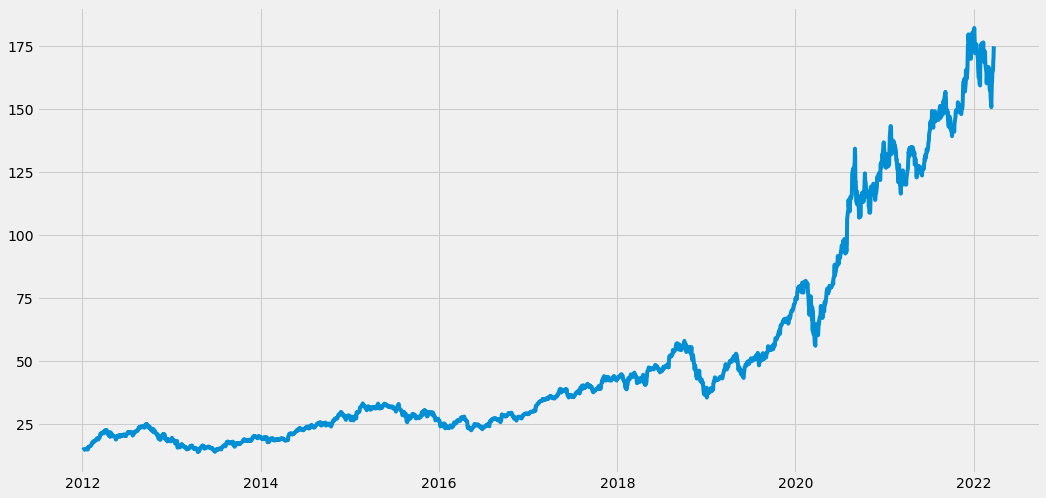

In [54]:
plt.figure(figsize = (16,8))
plt.plot(df['Close'])
plt.show()

In [61]:
data = df.filter(['Close'])
dataset = data.values

training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2060

In [63]:
# Scale the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_data = sc.fit_transform(dataset)

scaled_data

array([[-0.87857558],
       [-0.87670279],
       [-0.87281313],
       ...,
       [ 2.81164005],
       [ 2.90322916],
       [ 2.91865205]])

### Create the training data set

In [ ]:
train_data = scaled_data[:train]